In [1]:
import numpy as np
import matplotlib.pyplot as plt 

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

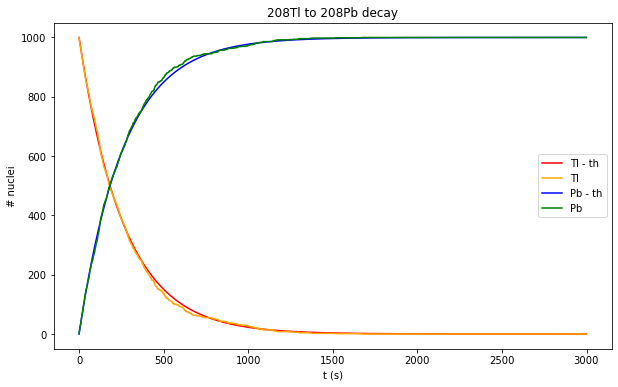

In [2]:
#Exercise 1

n0 = 1000
tau = 3.052*60 #seconds

t_tot = 3000 #seconds
time = np.arange(t_tot) #seconds

def p(t):
    return 1-2**(-t/tau)
    
    
nTl=1000
nPb=0
Tl = np.zeros(t_tot)
Pb = np.zeros(t_tot)

for t in time:
    for i in range(nTl):
        x = np.random.uniform() # random number between 0 and 1
        if x < p(1):   # Delta t = 1 second   
            nTl -= 1
            nPb += 1 
            if nTl == 0: 
                break # no more Tl nuclei
    Tl[t] = nTl
    Pb[t] = nPb


#Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time, n0*(1-p(time)), color="red", label="Tl - th")
ax.plot(time, Tl, color="orange", label="Tl")
ax.plot(time, n0*p(time), color= "blue", label= "Pb - th")
ax.plot(time, Pb, color="green", label="Pb")
ax.set_title("208Tl to 208Pb decay")
ax.set_xlabel("t (s)")
ax.set_ylabel("# nuclei")
ax.legend(loc="center right")


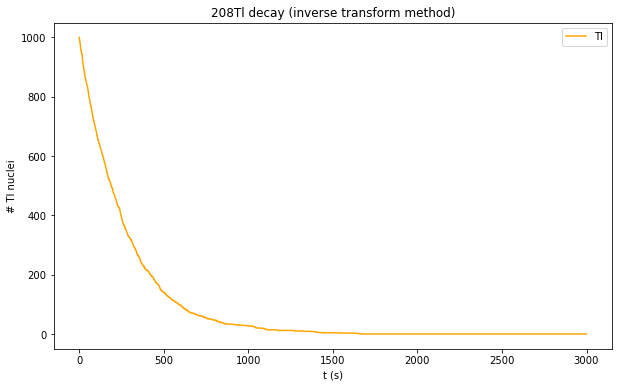

In [3]:
#Inverse transform method

def pdf(t):
    return 2**(-t/tau) * np.log(2)/tau

def icdf(x):
    return tau*np.log2(1/(1-x))


x = np.random.rand(n0)
decay_time = icdf(x)

Tl = []
for t in time:
    decay = len(decay_time[decay_time<t])
    Tl.append(n0 - decay)

#Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time, Tl, color="orange", label="Tl")
ax.set_title("208Tl decay (inverse transform method)")
ax.set_xlabel("t (s)")
ax.set_ylabel("# Tl nuclei")
ax.legend(loc="upper right")




2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Text(0, 0.5, 'f(x)')

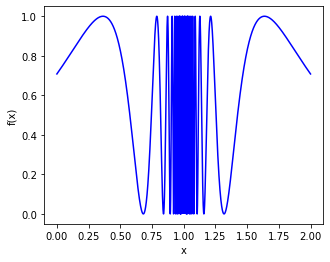

In [4]:
#Exercise 2

def f(x):
    return (np.sin(1 / (1 - x)))**2


#Plot the function
x = np.linspace(0, 2, 10000)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, f(x), color="blue")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")


In [5]:
N = 100000
iterations= 100

I = []
for i in range(iterations):
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        
        if y < f(x): 
            count += 1
    I.append(2 * count/N)

    
#Compute the integral of 𝑓(𝑥) between 0 and 2 with the hit/miss method. 
hm = np.mean(I)
sigma_hm = np.std(I) / np.sqrt(iterations)
print("Hit/miss method = %.4f +- %.4f" %(hm, sigma_hm))


#Repeat the integral with the mean value method. 
x = np.linspace(0, 2, N)
mv = 2 * np.mean(f(x))
sigma_mv = 2 * np.sqrt( (np.sum(f(x)**2)/N - np.sum(f(x)/N)**2) / N)
print("Mean value method = %.4f +- %.4f" %(mv, sigma_mv))


#Comparison
comp = np.abs(hm - mv) / np.sqrt(sigma_hm**2 + sigma_mv**2)
print("Compatibility %.2f" %comp)


Hit/miss method = 1.3468 +- 0.0003
Mean value method = 1.3468 +- 0.0021
Compatibility 0.02


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [6]:
#Exercise 3

def volume(x):              
    r2 = np.sum(x**2, axis=0)      
    return np.array([1 if (r<=1) else 0 for r in r2]) 

N = 1000000
# 2D 
print("2D")
x = np.random.uniform(-1, 1, (2, N))
v2D = 2**2 * np.mean(volume(x))
sigma_v2D = 2 * np.sqrt( (np.mean(volume(x)**2) - np.sum(volume(x)/N)**2) / N )
print("Volume from simulation = %.4f +- %.4f " % (v2D, sigma_v2D))
print("Analytical result = %.4f" % np.pi)
print("\n")

# 10D 
print("10D")
x = np.random.uniform(-1, 1, (10, N))
v10D = 2**10 * np.mean(volume(x))
sigma_v10D = 2 * np.sqrt( (np.mean(volume(x)**2)- np.sum(volume(x)/N)**2) / N )
print("Volume from simulation %.4f +- %.4f " % (v10D, sigma_v10D))
print("Analytical result = %.4f " % (np.pi**5/np.math.factorial(5)))


2D
Volume from simulation = 3.1412 +- 0.0008 
Analytical result = 3.1416


10D
Volume from simulation 2.5405 +- 0.0001 
Analytical result = 2.5502 


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [7]:
#Exercise 4

def f(x):
     return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

N = 100000
x = np.random.uniform(0,1,N)**2
I = (2/N) * np.sum(f(x) / w(x))
print("I = %.4f" %I)

#Comparison with analytical result
I_anal = 0.838932960
Delta_I = np.abs(I-I_anal)
print("Relative deviation from analytical result: %.3f" % (100*Delta_I/I), "%")


I = 0.8384
Relative deviation from analytical result: 0.063 %
